Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11 

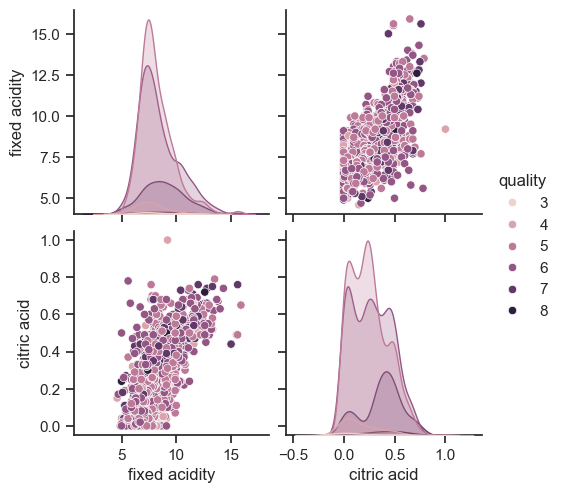

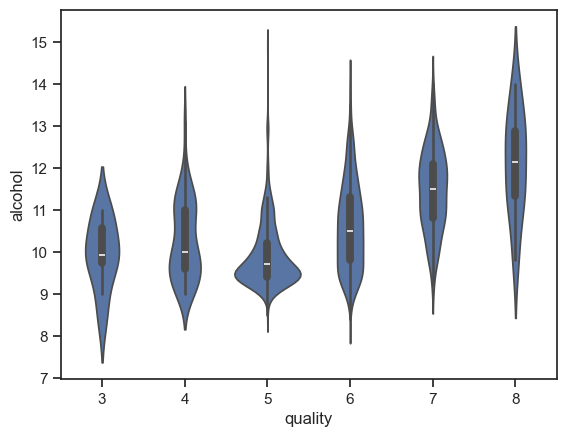

[[0.24778761 0.39726027]
 [0.28318584 0.52054795]
 [0.28318584 0.43835616]
 ...
 [0.15044248 0.26712329]
 [0.11504425 0.35958904]
 [0.12389381 0.13013699]]
(1599,)
(1599, 1)


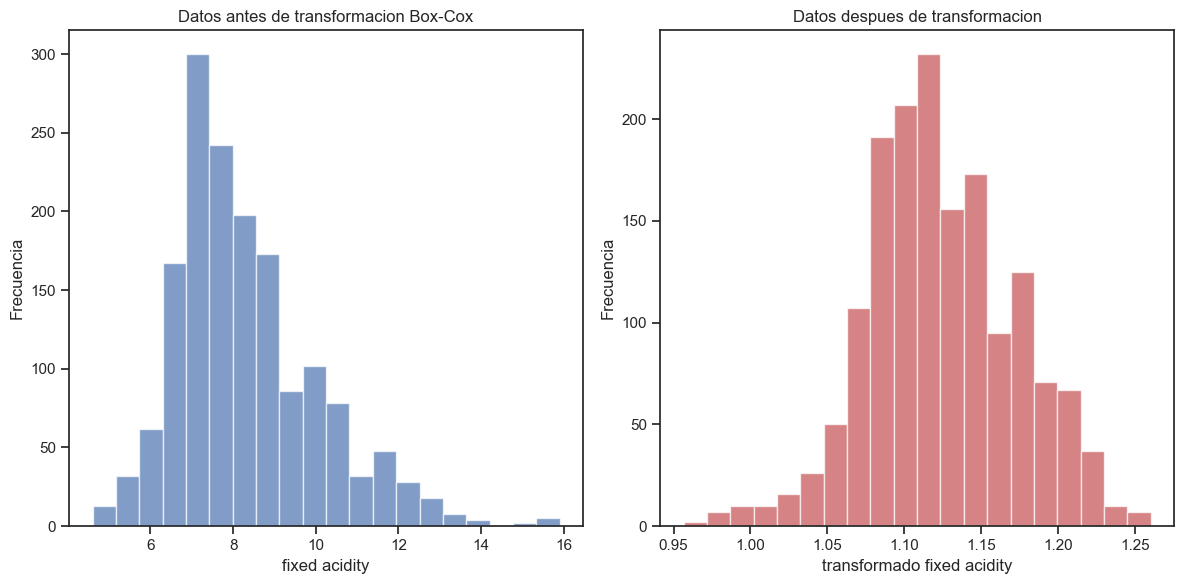

valor de lambda  -0.668616729335252


In [5]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

def load():
    path="winequality-red.csv"
    data=pd.read_csv(path,delimiter=';')
    #print(data)
    return data

def normalize(X):
    data_to_normalize=X
    variable_to_normalize='fixed acidity'
    data_transformed,lambda_value=boxcox(X)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.hist(data_to_normalize,bins=20,color='b',alpha=0.7)
    plt.title('Datos antes de transformacion Box-Cox')
    plt.xlabel(variable_to_normalize)
    plt.ylabel('Frecuencia')
    
    plt.subplot(1,2,2)
    plt.hist(data_transformed,bins=20,color='r',alpha=0.7)
    plt.title('Datos despues de transformacion')
    plt.xlabel('transformado '+variable_to_normalize)
    plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()
    print("valor de lambda ",lambda_value)

def plotVariables(data):
    print(data.info())
    print(data.describe())
    sns.set(style='ticks',color_codes=True)
    sns.pairplot(data=data,hue='quality',vars=['fixed acidity','citric acid'])
    plt.show()
    
    sns.violinplot(x="quality",y="alcohol",data=data)
    plt.show()
    
def main():
    data=load()
    print(data.columns)
    plotVariables(data)
    X=data[['fixed acidity','volatile acidity']]
    scaler=MinMaxScaler()
    X_scaled=scaler.fit_transform(X)
    print(X_scaled)
    
    print(data['fixed acidity'].shape)
    print(data[['fixed acidity']].shape)
    
    normalize(data['fixed acidity'])

main()